In [1]:
import os
import pydicom as dicom
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = "./PAT031"
ct_img = os.listdir(path)

In [4]:
slices = [dicom.read_file(path + "/" + s,force=True) for s in ct_img] 
slices = sorted(slices, key = lambda x:x.ImagePositionPatient[2])

In [5]:
pix_spacing = slices[0].PixelSpacing
slices_thickness = slices[0].SliceThickness

In [6]:
axial_aspect_ratio = pix_spacing[1] / pix_spacing[0]
sagital_aspect_ratio = pix_spacing[1] / slices_thickness
coronal_aspect_ratio = slices_thickness / pix_spacing[0]

In [7]:
print("Pixel spacing:", pix_spacing)
print("Slice Thickness:", slices_thickness)

#print axial, sagital, coronal
print("Axial Aspect Ratio:", axial_aspect_ratio)
print("Saital Aspect Ratio:", sagital_aspect_ratio)
print("Coronal Aspect Ratio:", coronal_aspect_ratio)

Pixel spacing: [0.673828, 0.673828]
Slice Thickness: 1
Axial Aspect Ratio: 1.0
Saital Aspect Ratio: 0.673828
Coronal Aspect Ratio: 1.4840582463180516


In [8]:
image_shape = list(slices[0].pixel_array.shape)
image_shape.append(len(slices))
volume_3d = np.zeros(image_shape)

In [9]:
#convert value into array
for i,s in enumerate(slices):
    array_2D = s.pixel_array
    volume_3d[:,:,i] = array_2D

In [10]:
print(array_2D.shape)
print(volume_3d.shape)

(512, 512)
(512, 512, 268)


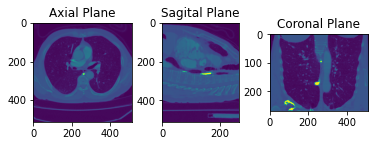

In [13]:
#plot for Axial, Sagital and Coronal Plane
axial = plt.subplot(2,3,1)
plt.title("Axial Plane")
plt.imshow(volume_3d[:,:,image_shape[2] // 2])
axial.set_aspect(axial_aspect_ratio)

sagital = plt.subplot(2,3,2)
plt.title("Sagital Plane")
plt.imshow(volume_3d[:, image_shape[1] // 2, :])
sagital.set_aspect(sagital_aspect_ratio)

coronal = plt.subplot(2,3,3)
plt.title("Coronal Plane")
plt.imshow(volume_3d[image_shape[0] // 2, :,:].T)
coronal.set_aspect(coronal_aspect_ratio)

plt.show()